In [16]:
## Import necessary packages
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [2]:
# Load in the Austin crime dataset
# df = os.path.join('Resources', 'Crime_Reports.csv')

datafile = '../austin_crime_project/Resources/Crime_Reports.csv'

In [3]:
data = pd.read_csv(datafile)
data.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.017115e+08,AGG ASLT STRANGLE/SUFFOCATE,410,Y,1/1/2017 10:30,1/1/2017,1030,1/1/2017 11:58,1/1/2017,1158,...,NaN,C,1/10/2017,13A,Aggravated Assault,3130704.0,3130704.0,30.359794,-97.688358,"(30.35979391, -97.688358)"
1,2.017100e+08,AGG ASSAULT,402,N,1/1/2017 0:07,1/1/2017,7,1/1/2017 0:07,1/1/2017,7,...,NaN,NaN,NaN,13A,Aggravated Assault,3114768.0,3114768.0,30.268162,-97.741362,"(30.26816195, -97.74136237)"
2,2.017109e+08,AGG ASSAULT,402,N,1/1/2017 4:20,1/1/2017,420,1/1/2017 4:20,1/1/2017,420,...,NaN,N,3/8/2017,13A,Aggravated Assault,3131193.0,3131193.0,30.318604,-97.687937,"(30.3186038, -97.68793685)"
3,2.017503e+10,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,1/1/2017 0:00,1/1/2017,0,8/10/2017 8:30,8/10/2017,830,...,NaN,O,8/17/2017,13A,Aggravated Assault,3099695.0,3099695.0,30.196029,-97.791021,"(30.1960291, -97.79102086)"
4,2.019239e+10,AGG FORCED SODOMY,1718,N,1/1/2017 21:29,1/1/2017,2129,8/27/2019 21:29,8/27/2019,2129,...,NaN,C,10/29/2019,11B,Rape,0.0,0.0,NaN,NaN,NaN


In [4]:
data.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
Newdata = data.drop(columns=["Incident Number", "Highest Offense Code", 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Address', 'Council District', 'APD Sector', 'Clearance Status', 'Clearance Date', 'UCR Category', 'X-coordinate', 'Y-coordinate', 'Latitude', 'Longitude'])

Newdata.head() 

,Highest Offense Description,Family Violence,Occurred Date Time,Location Type,Zip Code,APD District,PRA,Census Tract,Category Description,Location
0,AGG ASLT STRANGLE/SUFFOCATE,Y,1/1/2017 10:30,HOTEL / MOTEL / ETC.,78753.0,1,240.0,NaN,Aggravated Assault,"(30.35979391, -97.688358)"
1,AGG ASSAULT,N,1/1/2017 0:07,STREETS / HWY / ROAD / ALLEY,78701.0,2,381.0,NaN,Aggravated Assault,"(30.26816195, -97.74136237)"
2,AGG ASSAULT,N,1/1/2017 4:20,PARKING LOTS / GARAGE,78723.0,3,294.0,NaN,Aggravated Assault,"(30.3186038, -97.68793685)"
3,AGG ASSAULT FAM/DATE VIOLENCE,Y,1/1/2017 0:00,RESIDENCE / HOME,78745.0,3,526.0,NaN,Aggravated Assault,"(30.1960291, -97.79102086)"
4,AGG FORCED SODOMY,N,1/1/2017 21:29,RESIDENCE / HOME,78753.0,7,241.0,NaN,Rape,NaN


In [6]:
#Counting Highest Offense Description

count_data = Newdata["Highest Offense Description"].value_counts(ascending=False)
offense = count_data.head()
offense


FAMILY DISTURBANCE                25728
BURGLARY OF VEHICLE               23572
THEFT                             18444
CRIMINAL MISCHIEF                 12923
ASSAULT W/INJURY-FAM/DATE VIOL     8100
Name: Highest Offense Description, dtype: int64

In [7]:
#Count the Highest Location Type

location_data = Newdata["Location Type"].value_counts(ascending=False)
places = location_data.head()
places

RESIDENCE / HOME                102411
STREETS / HWY / ROAD / ALLEY     43931
PARKING LOTS / GARAGE            27283
OTHER / UNKNOWN                  15784
COMMERCIAL / OFFICE BUILDING      6213
Name: Location Type, dtype: int64

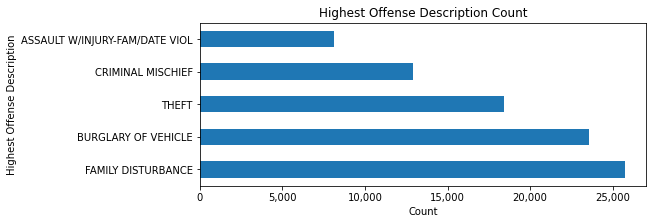

In [8]:
#Bar graph for visualization


fig=plt.figure(figsize=(8, 3))
plt.title("Highest Offense Description Count")
plt.xlabel("Count")
plt.ylabel("Highest Offense Description")
ax = offense.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

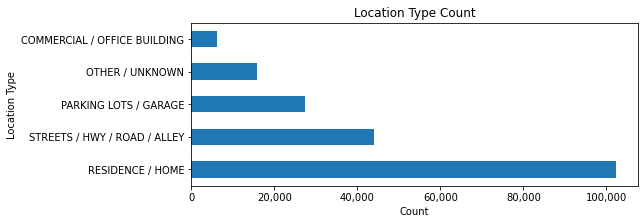

In [9]:
#Bar graph for visualization


fig=plt.figure(figsize=(8, 3))
plt.title("Location Type Count")
plt.xlabel("Count")
plt.ylabel("Location Type")
ax = places.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [10]:
#Grouping by Location Type and Highest Offense Description

groups = Newdata.groupby('Highest Offense Description')['Location Type'].value_counts()
pd.set_option("display.max_rows", None, "display.max_columns", None)

data = Newdata[Newdata["Location Type"] == "RESIDENCE / HOME"]
new_group = data["Highest Offense Description"].value_counts().sort_values(ascending = False)
top_group = new_group.head()
top_group


FAMILY DISTURBANCE                21413
BURGLARY OF VEHICLE                7905
THEFT                              6894
ASSAULT W/INJURY-FAM/DATE VIOL     6194
CRIMINAL MISCHIEF                  5148
Name: Highest Offense Description, dtype: int64

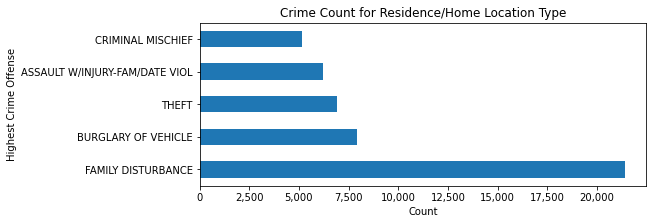

In [11]:
#Graph showing the top crimes of the "Residence/Home" location type

fig=plt.figure(figsize=(8, 3))
plt.title("Crime Count for Residence/Home Location Type")
plt.xlabel("Count")
plt.ylabel("Highest Crime Offense")
ax = top_group.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [12]:
# Chi squared test for crimes at Residence/Home location type

chi_table = pd.Series([21413, 7905, 6894, 6194, 5148], index=["Family Disturbance", "Burglary of Vehicle", "Theft", "Assault W/Injury-Fam/Date Viol", "Criminal Mischief"])

new_df = pd.DataFrame([chi_table]).T

# Add a column whose default values are the expected values
new_df[1] = 9510.8

#Rename columns
new_df.columns = ["Count", "Expected"]
new_df

,Count,Expected
Family Disturbance,21413,9510.8
Burglary of Vehicle,7905,9510.8
Theft,6894,9510.8
Assault W/Injury-Fam/Date Viol,6194,9510.8
Criminal Mischief,5148,9510.8


In [13]:
# With four rows, the degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [14]:
# Run the chi square test with stats.chisquare()
stats.chisquare(new_df["Count"], new_df["Expected"])

Power_divergenceResult(statistic=19044.01173402868, pvalue=0.0)

In [15]:
# Since our chi-squared value of 19044.012 is significanlty greater than our critical value of 9.488, we conclude that our 
# hypothesis is correct